# Traffic Signs Analyzer

Tensorflow project to build a deep learning model for Belgian traffic signs recognition

### Data sources: 
BelgiumTS for Classification (cropped images): 
- BelgiumTSC_Training
- BelgiumTSC_Testing

http://btsd.ethz.ch/shareddata/

In [62]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from skimage import transform
from skimage import data
from skimage.color import rgb2gray
import random
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook

output_notebook()

Loading BokehJS ...

## TensorFlow Basics

### Example 1: Multiplying two constants
The result is not getting calculated: we just defined the model but no process ran to calculate the result. Printing result does not really show a result.

In [4]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

In [5]:
x1

<tf.Tensor 'Const:0' shape=(4,) dtype=int32>

In [6]:
x2

<tf.Tensor 'Const_1:0' shape=(4,) dtype=int32>

In [7]:
# Multiply
result = tf.multiply(x1, x2)

# Print the result
print(result)

Tensor("Mul:0", shape=(4,), dtype=int32)


### Example 2: Multiplying two constants interactively
Running the code in an interactive session to actually see the result

In [8]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Intialize the Session
sess = tf.Session()

# Print the result
print(sess.run(result))

# Close the session
sess.close()

[ 5 12 21 32]


## Loading and Exploring the Data

In [17]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "./data/"
train_data_dir = os.path.join(ROOT_PATH, "Training")
test_data_dir = os.path.join(ROOT_PATH, "Testing")

images, labels = load_data(train_data_dir)



### Initial Look at Data

In [21]:
# convert images and labels to numpy array for print to work
images = np.array(images)
labels = np.array(labels)

# Print the `images` dimensions
print(images.ndim)

# Print the number of `images`'s elements
print(images.size)

# Print the first instance of `images`
images[0]

1
4575


array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [22]:
# Print the `labels` dimensions
print(labels.ndim)

# Print the number of `labels`'s elements
print(labels.size)

# Count the number of labels
print(len(set(labels)))

1
4575
62


In [39]:
p = figure(title="Distribution of Traffic Sign Labels",tools="save",
            background_fill_color="#dadad9")

hist, edges = np.histogram(labels, bins=62)

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#06aee2", line_color="#024c4b")

show(p)

### Visualizing The Traffic Signs

IMAGES


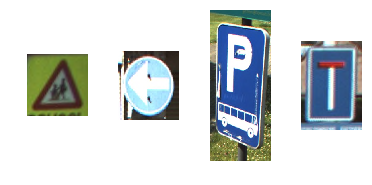


IMAGES WITH SHAPES


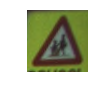

shape: (62, 61, 3), min: 3, max: 160


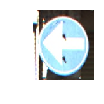

shape: (110, 96, 3), min: 3, max: 255


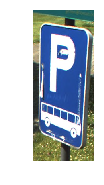

shape: (379, 153, 3), min: 0, max: 255


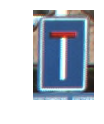

shape: (100, 68, 3), min: 17, max: 255


In [53]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

how_many_images = len(traffic_signs)

# Fill out the subplots with the random images that you defined 
for i in range(how_many_images):
    plt.subplot(1, how_many_images, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
print("IMAGES")
plt.show()

print("\nIMAGES WITH SHAPES")
# Fill out the subplots with the random images and add shape, min and max values
for i in range(how_many_images):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))


### Plotting an overview of all the 62 classes (labels) and one image that belongs to each class

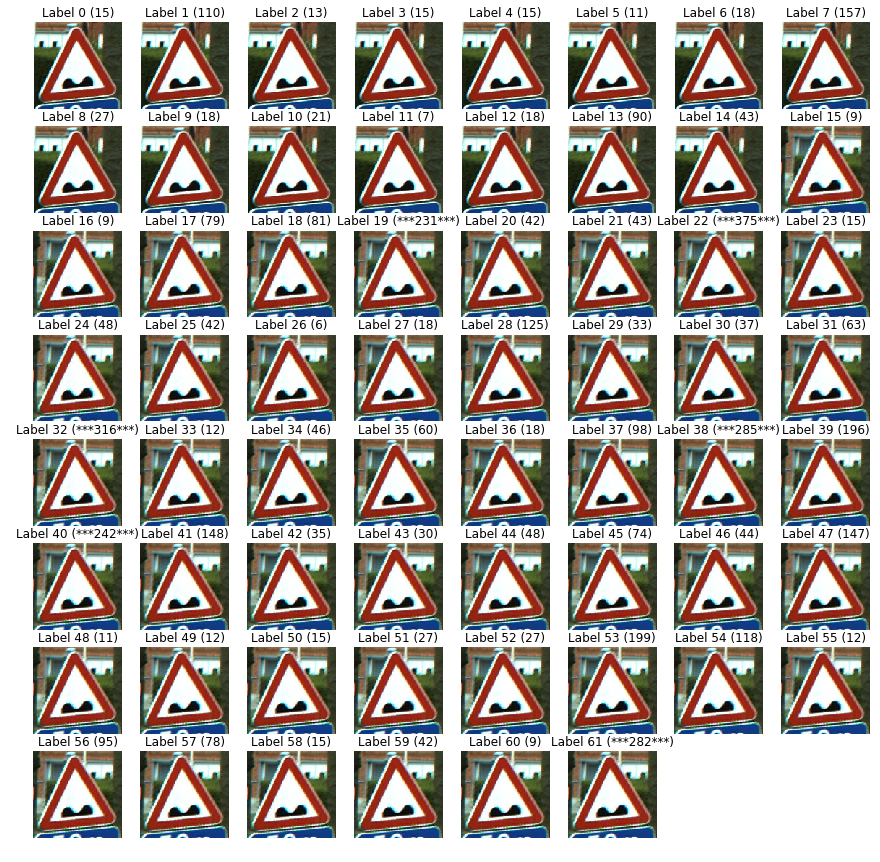

In [103]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels[label]]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Mark most popular labels
    label_ct = pd.Series(labels).value_counts()[label]
    if label_ct > 200:
        label_ct = '***' + str(label_ct) + '***'
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, label_ct))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

So far, we have learned that:
- The size of the images was unequal;
- There are 62 labels or target values (as your labels start at 0 and end at 61);
- The distribution of the traffic sign values is pretty unequal; There wasn’t really any connection between the signs that were heavily present in the dataset.

## Feature Extraction
**Rescaling** the images and **converting** the images that are held in the images array to grayscale. This color conversion will be done mainly because the color matters less in classification questions like the one we’re trying to answer now. On the other hand, if this were a detection problem, the color would play a big part. In those cases, the conversion would not be needed.

### Rescaling Images

In [119]:
# Rescale the images in the images array and convert to an array
images28 = [transform.resize(image, (28, 28)) for image in images]
images28 = np.array(images28)

/Users/aparravera/Applications/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


### Visualizing The Resized Traffic Signs


RESIZED IMAGES WITH SHAPES


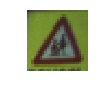

shape: (28, 28, 3), min: 0.061764705882353076, max: 0.6161764705882353


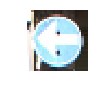

shape: (28, 28, 3), min: 0.07634053621448501, max: 1.0


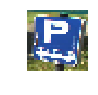

shape: (28, 28, 3), min: 0.08464760904361845, max: 1.0


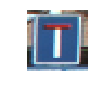

shape: (28, 28, 3), min: 0.08907563025210051, max: 1.0


In [120]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

how_many_images = len(traffic_signs)

print("\nRESIZED IMAGES WITH SHAPES")
# Fill out the subplots with the random images and add shape, min and max values
for i in range(how_many_images):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))


### Converting to Grayscale and Visualizing Changes

In [121]:
# Convert images28 to an array
images28 = rgb2gray(np.array(images28))

GRAYSCALED IMAGES


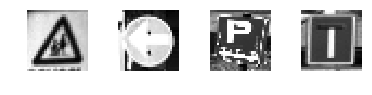

(4575, 28, 28)


In [123]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

how_many_images = len(traffic_signs)

# Fill out the subplots with the random images that you defined 
for i in range(how_many_images):
    plt.subplot(1, how_many_images, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap='gray')
    plt.subplots_adjust(wspace=0.5)
print("GRAYSCALED IMAGES")
plt.show()

print(images28.shape)

## Deep Learning with TensorFlow

### Modeling the Neural Network

In [125]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [126]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_1/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_1:0", shape=(?,), dtype=int64)


### Running the Neural Network
In the loop, the session is ran with the training optimizer and the loss (or accuracy) metric that was defined in the previous section. A feed_dict argument is also passed, which feeds data to the model. After each 10 epochs, a log gives more insights into the loss or cost of the model.

In [127]:
tf.set_random_seed(1234)

# Intialize the Session
sess = tf.Session()

# Run the session with run(), passing the initialized operations in the form of 
# the init variable that was defined in the previous section.
sess.run(tf.global_variables_initializer())

# Picking 201 in order to be able to register the last loss_value
for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 